# Examining Pew National Latino Surveys
by Ian Gomez; 
11/16/2020



In my quest to add data to conversations that often devolve into platitudes or party ideology, I've decided to learn how to navigate public polling datasets. This jupyter notebook is my first attempt at understanding the basics of analyzing Pew survey datasets with python. My primary goals are:
- Understanding required libraries
- Understanding standard input/output operations
- Learning how to store and manipulate survey dataframes
- Performing basic analysis with crosstabs
- Representing those crosstabs in tabular and graphical forms

The data I've chosen is from the Pew Research Center: https://www.pewresearch.org/hispanic/datasets/
- 2015 National Latino Survey
- 2018 National Latino Survey

Eventually, I would like to understand how to responsibly use polling data to gain some insight on how electorate preferences are shaped by public opinion on the issues _and_ the candidates' stances on those issues. 

For example, if all Democrats in Congress had run on Medicare for all, how many seats would they have gained or lost in the 2020 election? Obviously this is an oversimplified thought experiment, but I'm hoping the answer to such a question could yield a data driven starting point to more robust analysis.

In [30]:
# external libraries
import pandas as pd
import pyreadstat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read the survey files into dataframes
Use pyreadstat to store them in Pandas dataframes and create a meta data object. The meta object will allow us to get labels, questions, and other useful human readable info.

In [31]:
# read sav file and create a dict for columns
df15, meta15 = pyreadstat.read_sav('latino2015.sav')
df18, meta18 = pyreadstat.read_sav('latino2018.sav')

## Crosstabs
Now that we've loaded the data, let's play with the crosstabs. 

I've picked a three part question from the 2015 National Latino Survey as an example. Question 20 asks, "In general, how much do you have in common with people in the United States who are each of the following races or origins? 
- a. Whites
- c. Blacks or African Americans
- d. Asians or Asian-Americans"

For each part of the question, we'll look at the answer by country of origin/heritage. 

But first a quick note on how we generate these crosstabs using the default Pandas call and the wrapper I wrote. Note the wrapper won't work when we want to do something different to the data (i.e. take the mean of the data vs summing it). Here are some useful pages:
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html
- https://medium.com/@yangdustin5/quick-guide-to-pandas-pivot-table-crosstab-40798b33e367

In [32]:
# pandas crosstab and "quick_crosstab"

# pd.crosstab(df[answer to question], df[demographic], df.weight, aggfunc=sum, dropna=True, normalize='columns')

##### from data
# df[answer to question] = index, actual data about how much you have in common
# df[demographic]        = columns, country of origin/heritage
# df.weight              = weight applied to a particular respondent (to get a more representative sample)

##### mapping function calls
# .map(meta.xlabels)  # takes meta information and pulls the proper label information out 
# .map(meta.ylabels)  # a bit of a pain that the labels are not already set up thankfully it's an easy to rememember name (map) 

##### misc arguments
# aggfunc=sum          # Sum answers to question 
# dropna=True          # Do not include columns whose entries are all NaN (not a number)
# normalize='columns'  # Normalize by dividing all values by the sum of values in columns (i.e. create percentages) 

##### final function calls appended to crosstab
# .loc[meta.xlabels.values]         # a selection operation that sorts by index labels
# .loc[:,meta.ylabels.values] *100  # a selection operation that sorts by column labels \
                                    #   AND multiplies normalized values to get friendlier percentages 


def quick_crosstab(df,meta,x,y,weights):
    crosstab = pd.crosstab(
                            df[x].map(meta.variable_value_labels[x]), \
                            df[y].map(meta.variable_value_labels[y]),  \
                            weights, aggfunc=sum, dropna=True, normalize='columns'
                            ). \
                        loc[meta.variable_value_labels[x].values()]. \
                        loc[:,meta.variable_value_labels[y].values()] *100
    return(crosstab)  # values in percentages

In [33]:
demo = 'q3_combo'  # country of origin/heritage answers

ct15_whites = quick_crosstab(df15,meta15,'q20a',demo,df15.weights)  # White Americans
ct15_blacks = quick_crosstab(df15,meta15,'q20c',demo,df15.weights)  # Black Americans
ct15_asians = quick_crosstab(df15,meta15,'q20d',demo,df15.weights)  # Asian Americans

## Visualization 

The specfied crosstabs have been computed! But they are not very useful until we can see a table or another visualization. Let's use a seaborn heatmap.

Text(0.5, 1.0, 'How much do you have in common with White Americans?')

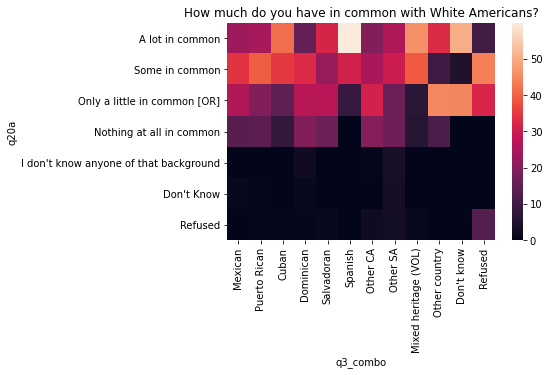

In [34]:
# heat map
sns.heatmap(ct15_whites,cmap='rocket')
plt.title("How much do you have in common with White Americans?")

Text(0.5, 1.0, 'How much do you have in common with African Americans?')

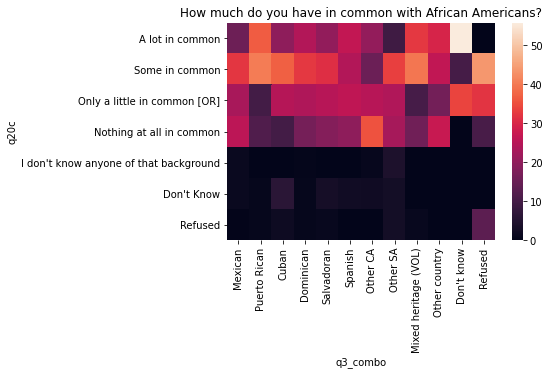

In [35]:
sns.heatmap(ct15_blacks,cmap='rocket')
plt.title("How much do you have in common with African Americans?")

Text(0.5, 1.0, 'How much do you have in common with Asian Americans?')

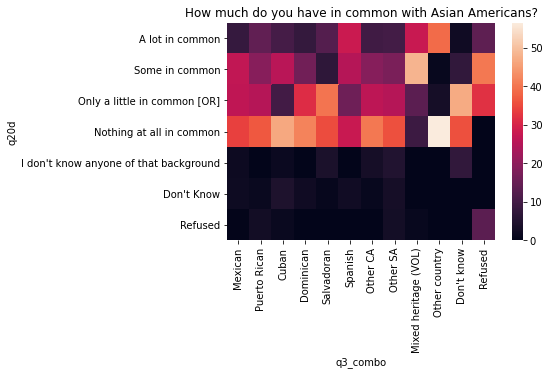

In [39]:
sns.heatmap(ct15_asians,cmap='rocket')
plt.title("How much do you have in common with Asian Americans?")

In [38]:
# 2018 voter enthusiasm by ethinicity
ct18_voting = pt.quick_crosstab(df18,meta18,'qn14b','qn3',df18.weight)
